Lade NBA-Daten …


C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\3764924412.py:311: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', color='white')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\3764924412.py:311: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', color='white')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\3764924412.py:311: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right', color='white')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\3764924412.py:311: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.

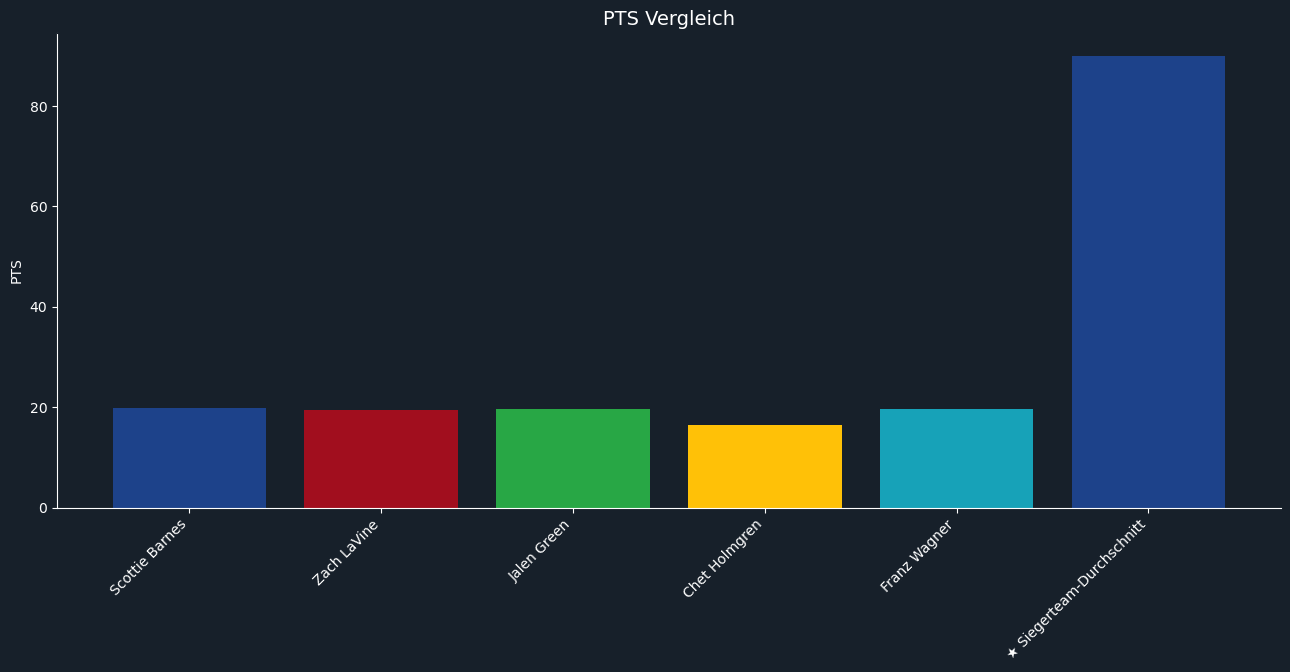

In [8]:
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import json

# --- Daten abrufen ---
print("Lade NBA-Daten …")
stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24').get_data_frames()[0]
time.sleep(1)
stats = stats[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'GP', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']]
stats[['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']] = stats[['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']].div(stats['GP'], axis=0)
stats_df = stats.set_index('PLAYER_NAME').sort_index()

# --- GUI Setup ---
root = tk.Tk()
root.title("NBA Spieler Vergleicher")
root.geometry("1150x700")
root.configure(bg="#17202A")

style = ttk.Style(root)
style.theme_use("clam")
style.configure("Treeview", background="white", foreground="#17202A", rowheight=25, fieldbackground="white")
style.configure("Treeview.Heading", background="#1D428A", foreground="white", font=('Segoe UI', 10, 'bold'))
style.configure("TButton", font=('Segoe UI', 10, 'bold'), background="#1D428A", foreground="white")
style.map("TButton", background=[('active', '#A10E1E')], foreground=[('active', 'white')])
style.configure("SumRow.Treeview", background="#D3D3D3", foreground="#17202A", font=('Segoe UI', 10, 'bold'))

# --- Layout Frames ---
left_frame = tk.Frame(root, bg="#17202A")
left_frame.pack(side="left", fill="y", padx=20, pady=20)

right_frame = tk.Frame(root, bg="#17202A")
right_frame.pack(side="right", fill="both", expand=True, padx=20, pady=20)

# --- Suchfeld & Spieler-Liste ---
tk.Label(left_frame, text="Spieler suchen:", fg="white", bg="#17202A", font=('Segoe UI', 12)).pack(anchor="w")
search_var = tk.StringVar()
search_entry = tk.Entry(left_frame, textvariable=search_var, font=('Segoe UI', 11), width=25)
search_entry.pack(anchor="w", pady=(0, 10))

listbox_frame = tk.Frame(left_frame)
listbox_frame.pack()

scrollbar_y = tk.Scrollbar(listbox_frame, orient="vertical")
scrollbar_y.pack(side="right", fill="y")

player_listbox = tk.Listbox(listbox_frame, selectmode="multiple", height=25, width=30,
                            yscrollcommand=scrollbar_y.set, font=('Segoe UI', 11))
player_listbox.pack(side="left", fill="y")
scrollbar_y.config(command=player_listbox.yview)

for name in stats_df.index:
    player_listbox.insert("end", name)

# Vergleichs-Button
compare_btn = ttk.Button(left_frame, text="🔍 Vergleichen")
compare_btn.pack(pady=10)

# Entfernen-Button
remove_btn = ttk.Button(left_frame, text="❌ Entfernen")
remove_btn.pack(pady=(0, 10))

# --- Vergleichstabelle + Scrollbars ---
columns = ['Spieler', 'Team', 'GP', 'PTS', 'REB', 'AST', 'STL', 'BLK', '3PM']
tree_frame = tk.Frame(right_frame)
tree_frame.pack(fill="both", expand=True)

tree_scroll_y = ttk.Scrollbar(tree_frame)
tree_scroll_y.pack(side='right', fill='y')

tree_scroll_x = ttk.Scrollbar(tree_frame, orient='horizontal')
tree_scroll_x.pack(side='bottom', fill='x')

tree = ttk.Treeview(tree_frame, columns=columns, show='headings',
                    yscrollcommand=tree_scroll_y.set, xscrollcommand=tree_scroll_x.set)

tree_scroll_y.config(command=tree.yview)
tree_scroll_x.config(command=tree.xview)

for col in columns:
    tree.heading(col, text=col)
    tree.column(col, anchor='center', width=100)

tree.pack(fill="both", expand=True)

# --- Statistik-Auswahl und Diagrammtyp ---
stat_options = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']
selected_stat = tk.StringVar(value=stat_options[0])

tk.Label(left_frame, text="Statistik auswählen:", fg="white", bg="#17202A", font=('Segoe UI', 12)).pack(anchor="w", pady=(10,5))
stat_dropdown = ttk.Combobox(left_frame, values=stat_options, textvariable=selected_stat, state="readonly", font=('Segoe UI', 11), width=10)
stat_dropdown.pack(anchor="w", pady=(0,10))

chart_types = ['Balken', 'Linie', 'Punkte']
selected_chart_type = tk.StringVar(value=chart_types[0])

tk.Label(left_frame, text="Diagrammtyp:", fg="white", bg="#17202A", font=('Segoe UI', 12)).pack(anchor="w", pady=(10,5))
chart_dropdown = ttk.Combobox(left_frame, values=chart_types, textvariable=selected_chart_type, state="readonly", font=('Segoe UI', 11), width=10)
chart_dropdown.pack(anchor="w", pady=(0, 10))

# --- Farbpalette für Diagramme ---
color_palette = ['#1D428A', '#A10E1E', '#28A745', '#FFC107', '#17A2B8']

# --- Matplotlib Diagramm vorbereiten ---
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
fig.patch.set_facecolor('#17202A')
ax.set_facecolor('#17202A')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('#17202A')
ax.spines['right'].set_color('#17202A')

canvas = FigureCanvasTkAgg(fig, master=right_frame)
canvas.get_tk_widget().pack(fill="both", expand=True, pady=(10,0))

# --- Buttons unter Diagramm ---
button_frame = tk.Frame(right_frame, bg="#17202A")
button_frame.pack(pady=10)

save_btn = ttk.Button(button_frame, text="Diagramm speichern")
save_btn.grid(row=0, column=0, padx=10)

load_btn = ttk.Button(button_frame, text="Spieler-Auswahl laden")
load_btn.grid(row=0, column=1, padx=10)

save_sel_btn = ttk.Button(button_frame, text="Spieler-Auswahl speichern")
save_sel_btn.grid(row=0, column=2, padx=10)

refresh_btn = ttk.Button(button_frame, text="Aktualisieren")
refresh_btn.grid(row=0, column=3, padx=10)

# --- Globale Auswahl ---
selected_players = []

# --- Referenzwerte Siegerteam-Durchschnitt (2023/24) ---
reference_stats = {
    'Spieler': '★ Siegerteam-Durchschnitt',
    'Team': '',
    'GP': 0,
    'PTS': round(120.01 * 0.75, 1),
    'REB': round(46.10 * 0.75, 1),
    'AST': round(28.01 * 0.75, 1),
    'STL': round(8.16 * 0.75, 1),
    'BLK': round(5.79 * 0.75, 1),
    '3PM': 49.76
}

# --- Funktionen ---
def update_sum_row():
    # Entferne alte Summenzeile
    for item in tree.get_children():
        if tree.item(item, "tags") == ("sumrow",):
            tree.delete(item)
    # Berechne Summen für numerische Spalten (außer Spieler und Team)
    gp_sum = 0
    pts_sum = 0
    reb_sum = 0
    ast_sum = 0
    stl_sum = 0
    blk_sum = 0
    fg3m_sum = 0
    for child in tree.get_children():
        tags = tree.item(child, "tags")
        if "sumrow" in tags or "reference" in tags:
            continue

        vals = tree.item(child)['values']
        gp_sum += int(vals[2])
        pts_sum += float(vals[3])
        reb_sum += float(vals[4])
        ast_sum += float(vals[5])
        stl_sum += float(vals[6])
        blk_sum += float(vals[7])
        fg3m_sum += float(vals[8])
    # Fügt Summenzeile ganz oben ein
    tree.insert('', 0, values=[
        'Σ Gesamt',
        '',
        gp_sum,
        round(pts_sum,1),
        round(reb_sum,1),
        round(ast_sum,1),
        round(stl_sum,1),
        round(blk_sum,1),
        round(fg3m_sum,1),
    ], tags=('sumrow',))
    # Style Summenzeile
    tree.tag_configure('sumrow', background="#D3D3D3", font=('Segoe UI', 10, 'bold'))

def insert_reference_row():
    # Lösche vorhandene Referenz-Zeile
    for item in tree.get_children():
        if tree.item(item, "tags") == ("reference",):
            tree.delete(item)
    # Referenzwerte einfügen
    tree.insert('', 0, values=[
        reference_stats['Spieler'],
        reference_stats['Team'],
        reference_stats['GP'],
        reference_stats['PTS'],
        reference_stats['REB'],
        reference_stats['AST'],
        reference_stats['STL'],
        reference_stats['BLK'],
        reference_stats['3PM'],
    ], tags=('reference',))
    tree.tag_configure('reference', background="#F0E68C", font=('Segoe UI', 10, 'italic'))

def filter_players(*args):
    search = search_var.get().lower()
    player_listbox.delete(0, 'end')
    for name in stats_df.index:
        if search in name.lower():
            player_listbox.insert('end', name)

def compare_selected():
    global selected_players
    existing_players = [tree.item(child)['values'][0] for child in tree.get_children() if tree.item(child, "tags") not in ("sumrow", "reference")]

    sel = player_listbox.curselection()
    added = False
    for i in sel:
        name = player_listbox.get(i)
        if name in existing_players:
            continue
        row = stats_df.loc[name]
        values = [
            name,
            row['TEAM_ABBREVIATION'], int(row['GP']),
            round(row['PTS'], 1), round(row['REB'], 1),
            round(row['AST'], 1), round(row['STL'], 1),
            round(row['BLK'], 1), round(row['FG3M'], 1)
        ]
        tree.insert('', 'end', values=values)
        if name not in selected_players:
            selected_players.append(name)
        added = True

    if added:
        update_sum_row()
        insert_reference_row()
        draw_plot()

def remove_selected():
    global selected_players
    selected_items = tree.selection()
    for item in selected_items:
        if tree.item(item, "tags") in ("sumrow", "reference"):
            continue  # Summenzeile und Referenzzeile nicht löschen
        player_name = tree.item(item)['values'][0]
        if player_name in selected_players:
            selected_players.remove(player_name)
        tree.delete(item)
    update_sum_row()
    insert_reference_row()
    draw_plot()

def draw_plot():
    stat = selected_stat.get()
    chart_type = selected_chart_type.get()
    if not selected_players:
        ax.clear()
        ax.set_facecolor('#17202A')
        ax.tick_params(colors='white')
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_color('#17202A')
        ax.spines['right'].set_color('#17202A')
        ax.set_title("Keine Spieler ausgewählt", color='white', fontsize=14)
        canvas.draw()
        return

    values = []
    labels = []

    for name in selected_players:
        if name in stats_df.index:
            val = stats_df.loc[name][stat]
            values.append(val)
            labels.append(name)

    # Referenzwert auch in Diagramm anzeigen
    labels.append(reference_stats['Spieler'])
    values.append(reference_stats.get(stat, 0))

    ax.clear()
    ax.set_facecolor('#17202A')
    ax.tick_params(colors='white', labelsize=10)
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('#17202A')
    ax.spines['right'].set_color('#17202A')

    colors = color_palette * (len(values) // len(color_palette) + 1)
    colors = colors[:len(values)]

    if chart_type == 'Balken':
        ax.bar(labels, values, color=colors)
    elif chart_type == 'Linie':
        ax.plot(labels, values, color='#1D428A', marker='o')
    elif chart_type == 'Punkte':
        ax.scatter(labels, values, color='#A10E1E', s=100)

    ax.set_title(f'{stat} Vergleich', color='white', fontsize=14)
    ax.set_ylabel(stat, color='white')
    ax.set_xticklabels(labels, rotation=45, ha='right', color='white')
    canvas.draw()

def save_chart():
    file_path = filedialog.asksaveasfilename(defaultextension=".png",
                                             filetypes=[("PNG files", "*.png"), ("All files", "*.*")])
    if file_path:
        fig.savefig(file_path)
        messagebox.showinfo("Gespeichert", f"Diagramm wurde gespeichert unter:\n{file_path}")

def save_selection():
    if not selected_players:
        messagebox.showwarning("Warnung", "Keine Spieler ausgewählt zum Speichern!")
        return
    file_path = filedialog.asksaveasfilename(defaultextension=".json",
                                             filetypes=[("JSON files", "*.json"), ("All files", "*.*")])
    if file_path:
        with open(file_path, 'w') as f:
            json.dump(selected_players, f)
        messagebox.showinfo("Gespeichert", f"Spielerauswahl wurde gespeichert unter:\n{file_path}")

def load_selection():
    global selected_players
    file_path = filedialog.askopenfilename(filetypes=[("JSON files", "*.json"), ("All files", "*.*")])
    if file_path:
        with open(file_path, 'r') as f:
            loaded = json.load(f)
        # Entferne alle alten Einträge außer Summenzeile und Referenzzeile
        for item in tree.get_children():
            if tree.item(item, "tags") not in ("sumrow", "reference"):
                tree.delete(item)
        selected_players = []
        for name in loaded:
            if name in stats_df.index:
                row = stats_df.loc[name]
                values = [
                    name,
                    row['TEAM_ABBREVIATION'], int(row['GP']),
                    round(row['PTS'], 1), round(row['REB'], 1),
                    round(row['AST'], 1), round(row['STL'], 1),
                    round(row['BLK'], 1), round(row['FG3M'], 1)
                ]
                tree.insert('', 'end', values=values)
                selected_players.append(name)
        insert_reference_row()
        update_sum_row()
        draw_plot()

def refresh_data():
    # Daten neu laden
    global stats_df
    try:
        new_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24').get_data_frames()[0]
        time.sleep(1)
        new_stats = new_stats[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'GP', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']]
        new_stats[['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']] = new_stats[['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG3M']].div(new_stats['GP'], axis=0)
        stats_df = new_stats.set_index('PLAYER_NAME').sort_index()
        # Aktualisiere Listbox
        player_listbox.delete(0, 'end')
        for name in stats_df.index:
            player_listbox.insert('end', name)
        messagebox.showinfo("Aktualisiert", "Daten wurden aktualisiert.")
        # Tabelle & Diagramm neu zeichnen
        load_selection()  # Lädt gespeicherte Auswahl neu (falls vorhanden)
        draw_plot()
    except Exception as e:
        messagebox.showerror("Fehler", f"Daten konnten nicht aktualisiert werden:\n{e}")

# --- Events ---
search_var.trace_add('write', filter_players)
compare_btn.config(command=compare_selected)
remove_btn.config(command=remove_selected)
save_btn.config(command=save_chart)
save_sel_btn.config(command=save_selection)
load_btn.config(command=load_selection)
refresh_btn.config(command=refresh_data)

stat_dropdown.bind("<<ComboboxSelected>>", lambda e: draw_plot())
chart_dropdown.bind("<<ComboboxSelected>>", lambda e: draw_plot())

# --- Initiale Anzeige ---
update_sum_row()
insert_reference_row()

root.mainloop()
